## 결과가 좋지 않다! (FrozenLake-v0)

In [20]:
import numpy as np 
import gym
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
print(np.identity(16)[0:1])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [3]:
print(np.identity(16)[10:11])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [4]:
print(np.identity(16))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [5]:
def one_hot(x) :
    return np.identity(16)[x:x+1]

In [9]:
env = gym.make('FrozenLake-v0')

In [10]:
input_size = env.observation_space.n
output_size = env.action_space.n
learning_rate = 0.1

In [15]:
X = tf.placeholder(shape=[1,input_size] , dtype = tf.float32)
W = tf.Variable(tf.random_uniform([input_size,output_size] , 0,0.01))
Qpred = tf.matmul(X,W)

Instructions for updating:
Colocations handled automatically by placer.


In [18]:

Y = tf.placeholder(shape=[1,output_size] , dtype = tf.float32)

loss = tf.reduce_sum(tf.square(Y-Qpred))
train = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

In [22]:
dis = .99
num_episodes = 2000
init = tf.global_variables_initializer()
rList = []

In [29]:
with tf.Session() as sess : 
    sess.run(init)
    for i in range(num_episodes) : 
        s = env.reset()
        e = 1. / ((i/50) + 10 )
        rAll = 0 
        done = False 
        local_loss = []
        
        while not done :
            Qs = sess.run(Qpred, feed_dict = {X : one_hot(s)})
            if np.random.rand(1) < e :        #다음 action선택
                a = env.action_space.sample()
            else :
                a = np.argmax(Qs)
            
            s1, reward, done, _ = env.step(a)
            if done :                        #action했을 때의 reward 
                Qs[0, a] = reward
            else : 
                Qs1 = sess.run(Qpred , feed_dict = {X : one_hot(s1)})
                Qs[0, a] = reward + dis * np.max(Qs1)
                
            sess.run(train, feed_dict={X : one_hot(s) , Y : Qs})
            
            rAll += reward 
            s = s1
        rList.append(rAll)     

Percent of successful episodes : 0.477%


<function matplotlib.pyplot.show(*args, **kw)>

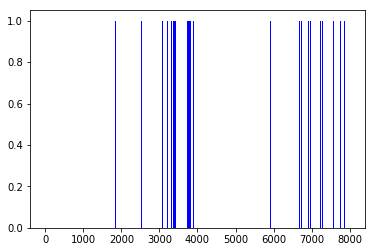

In [30]:
print("Percent of successful episodes : " + str(sum(rList) / num_episodes) + "%")
plt.bar(range(len(rList)), rList, color="blue")
plt.show